In [1]:
# read test.csv file
import pandas as pd
test = pd.read_parquet('Preprocessed Files/test.parquet')
test

,label,comment,score,ups,downs,parent_comment
735921,0,As many as you want,1,1,0,"Again, deferential treatment. How many solid s..."
558801,1,You're on the subreddit for it mate!,1,1,0,Not particularly. I would much rather have rea...
506166,0,Fuck toronto,17,17,0,Go Raptors
419374,0,He's dead tho,1,1,0,If there is ever a person that will save the d...
511264,0,But think of how good that blowjob would be.,9,9,0,What the actual fuck is this comment
...,...,...,...,...,...,...
676250,1,I dont want to trade an all star for a non-all...,1,1,0,What if the Celtics offered 3 and Isaiah Thoma...
353981,1,"Is it going to be first revealed with decoys, ...",0,0,0,"Evleaks on Twitter: ""Huawei Nexus sounds impre..."
647737,1,facebook is so like 2006...,1,1,0,Well of course
533800,0,Actually they are saying that.,1,1,0,"They're saying it works, not that it'll be the..."


In [4]:
def pre_process():

    import warnings
    warnings.filterwarnings('ignore')

    import re
    import nltk
    import contractions
    from nltk.corpus import stopwords

    import pandas as pd
    test  = pd.read_parquet('Preprocessed Files/test.parquet')

    # Removing URL links (e.g., "Checkout www.reddit.com" ---> "Checkout")
    def remove_URLLinks(text):
        text = re.sub(r'https?://\S+|www\.\S+', '', text, flags = re.MULTILINE)
        return text

    # Removing HTML tags (e.g., "<p>AutoML</p>" ---> "AutoML")
    def remove_HTMLTags(text):
        text = re.sub(r'<.*?>', '', text, flags = re.MULTILINE)
        return text

    # Converting a word to lower case (e.g., "NLP" ---> "nlp")
    def convert_ToLowerCase(text):
        return text.lower()

    # Removing new line (e.g., "\nThis\nisn't\nfunny" ---> "This isn't funny")
    def remove_NewLine(text):
        return re.sub(r'\n', ' ', text)

    # Removing words with numbers (e.g., "king123" ---> "king")
    def remove_WordsWithNumbers(text):
        return re.sub(r'\S*\d\S*', '', text).strip()

    # Removing punctuations (e.g., "green!" ---> "green")
    def remove_Puctuations(text):
        return re.sub(r'[^a-zA-Z\d\s]', '', text)

    # Expanding contractions (e.g., "don’t" ---> "do not")
    def expand_Contractions(text):
        output = []
        for i in text.split(' '):
            output.append(contractions.fix(i))

        return ' '.join(output)

    # Removing white spaces (e.g., "  Own country" ---> "Own country")
    def remove_WhiteSpaces(text):
        return text.strip()

    # Removing spaces more than one (e.g., "North   Korea" ---> "North Korea")
    def remove_SpacesMoreThanOne(text):
        return re.sub('[ ]{2,}', ' ', text).strip()

    def pre_process(data):
    
        data = str(data)

        data = remove_URLLinks(text = data)
        data = remove_HTMLTags(text = data)
        data = convert_ToLowerCase(text = data)
        data = remove_NewLine(text = data)
        data = remove_WordsWithNumbers(text = data)
        data = expand_Contractions(text = data)
        data = remove_Puctuations(text = data)
        data = remove_WhiteSpaces(text = data)
        data = remove_SpacesMoreThanOne(text = data)
    
        return data

    # pre_processing "comment" feature
    test['pre_comment'] = test.apply(lambda x : pre_process(data = x['comment']), axis = 1)
   
    # pre_processing "parent_comment" feature
    test['pre_parent_comment'] = test.apply(lambda x : pre_process(data = x['parent_comment']), axis = 1)
    
    ########################################################[tokenize : pre_comment]############################################################################
    
    import pickle
    import numpy as np
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    # max_length
    max_length_c = 40
    
    # tokenizer
    tokenizer_c       = pickle.load(open('Preprocessed Files/Pickle Files/tokenizer_comment.pkl','rb'))
    test_c_sequences  = tokenizer_c.texts_to_sequences(test['pre_comment'].values)
    test_c_padding    = pad_sequences(test_c_sequences, maxlen = max_length_c)
    
    # vocab_size
    vocab_size_c = tokenizer_c.word_index
    
    # embedding_size
    embedding_size_c = 300
    
    # embedding_matrix
    embedding_matrix_c = pickle.load(open('Preprocessed Files/Pickle Files/embedding_matrix_comment.pkl','rb'))
    
    #############################################################[tokenize : pre_parent_comment]#################################################################
    
    import pickle
    import numpy as np
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    # max_length
    max_length_pc = 150
    
    # tokenizer
    tokenizer_pc       = pickle.load(open('Preprocessed Files/Pickle Files/tokenizer_parent_comment.pkl','rb'))
    test_pc_sequences  = tokenizer_pc.texts_to_sequences(test['pre_parent_comment'].values)
    test_pc_padding    = pad_sequences(test_pc_sequences, maxlen = max_length_pc)
    
    # vocab_size
    vocab_size_pc = tokenizer_pc.word_index
    
    # embedding_size
    embedding_size_pc = 300
    
    # embedidng_matrix
    embedding_matrix_pc = pickle.load(open('Preprocessed Files/Pickle Files/embedding_matrix_parent_comment.pkl','rb'))
    
    ######################################################[StandardScaler : score, ups, downs]##################################################################
    
    # score
    sc_score = pickle.load(open('Preprocessed Files/Pickle Files/Standard_Scaler_score.pkl','rb'))
    test_score = sc_score.transform(test['score'].values.reshape(-1, 1))

    # ups
    sc_ups = pickle.load(open('Preprocessed Files/Pickle Files/Standard_Scaler_ups.pkl','rb'))
    test_ups = sc_ups.transform(test['ups'].values.reshape(-1, 1))
    
    # downs
    sc_downs = pickle.load(open('Preprocessed Files/Pickle Files/Standard_Scaler_downs.pkl','rb'))
    test_downs = sc_downs.transform(test['downs'].values.reshape(-1, 1))
    
    # X_test : pre_comment, pre_parent_comment, score, ups, downs
    x_test = [test_c_padding, test_pc_padding, test_score, test_ups, test_downs]
    
    # y_test : label
    y_test = test['label']
    
    return max_length_c, vocab_size_c, embedding_size_c, embedding_matrix_c,\
           max_length_pc, vocab_size_pc, embedding_size_pc, embedding_matrix_pc,\
           x_test, y_test

In [28]:
def predict():

    import tensorflow as tf
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs
    
    # read test.csv file
    import pandas as pd
    test  = pd.read_parquet('Preprocessed Files/test.parquet')
    
    # calling pre_process function
    max_length_c, vocab_size_c, embedding_size_c, embedding_matrix_c,\
    max_length_pc, vocab_size_pc, embedding_size_pc, embedding_matrix_pc,\
    x_test, y_test = pre_process()
    
    ################################################[comment_layer]################################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # take pre_comment as input
    input_layer_1 = Input(shape = (max_length_c, ),
                          name  = 'comment')
    
    # embedding layer
    c_feature = Embedding(input_dim    = len(vocab_size_c) + 1,
                          output_dim   = embedding_size_c,
                          weights      = [embedding_matrix_c],
                          input_length = max_length_c,
                          trainable    = False)(input_layer_1)

    # LSTM layer 
    c_feature = LSTM(100)(c_feature)

    # flatten
    c_flatten = Flatten()(c_feature)
    
    ################################################[parent_comment_layer]########################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # take pre_parent_comment as input
    input_layer_2 = Input(shape = (max_length_pc, ),
                          name  = 'parent_comment')
    
    # embedding layer
    pc_feature = Embedding(input_dim    = len(vocab_size_pc) + 1,
                           output_dim   = embedding_size_pc,
                           weights      = [embedding_matrix_pc],
                           input_length = max_length_pc,
                           trainable    = False)(input_layer_2)
    
    # LSTM layer
    pc_feature = LSTM(100)(pc_feature)

    # flatten
    pc_flatten = Flatten()(pc_feature)
    
    ###############################################[numerical_layer]##############################################
    
    from tensorflow.keras.layers import Input, Dense
    
    # take score as input
    input_layer_3 = Input(shape = (1, ), name = 'score')
    # dense_layer
    score_dense = Dense(units = 256, activation = 'relu')(input_layer_3)
    
    # take ups as input
    input_layer_4 = Input(shape = (1, ), name = 'ups')
    # dense_layer
    ups_dense = Dense(units = 256, activation = 'relu')(input_layer_4)
    
    # take downs as input
    input_layer_5 = Input(shape = (1, ), name = 'downs')
    # dense_layer
    downs_dense = Dense(units = 256, activation = 'relu')(input_layer_5)
    
    ###############################################[concatenate]##################################################
    
    from tensorflow.keras.layers import concatenate
    
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import Model
    
    # concatenate
    merge = concatenate([c_flatten, 
                         pc_flatten, 
                         score_dense, ups_dense, downs_dense])
    
    # dropout_layer
    dropout_layer = Dropout(0.2)(merge)
    
    # dense_layer_1
    dense_layer_1 = Dense(units      = 256, 
                          activation = 'relu', 
                          name       = 'fully_connected')(dropout_layer)
    
    # dense_layer_2
    dense_layer_2 = Dense(units      = 128, 
                          activation = 'relu')(dense_layer_1)
    # output_layer
    output_layer  = Dense(units      = 1, 
                          activation = 'sigmoid')(dense_layer_2)
    # Model_1
    model = Model(inputs  = [input_layer_1, 
                             input_layer_2, 
                             input_layer_3, input_layer_4, input_layer_5],
                  outputs = output_layer)

######################################################################[compile & loading]#############################################################################

    from tensorflow.keras import backend as K
    from tensorflow.keras.optimizers import Adam

    ###############################################[precision]##############################################

    def precision(y_true, y_pred):

        true_positives      = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision           = true_positives / (predicted_positives + K.epsilon())
    
        return precision

    ################################################[recall]###############################################

    def recall(y_true, y_pred):

        true_positives     = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall             = true_positives / (possible_positives + K.epsilon())
    
        return recall

    ###############################################[f1_score]###############################################

    def f1_score(y_true, y_pred):

        precision_ = precision(y_true, y_pred)
        recall_    = recall(y_true, y_pred)
        f1_score   = 2*((precision_ * recall_)/(precision_ + recall_ + K.epsilon()))

        return f1_score

    # compile
    model.compile(optimizer = Adam(),
                  loss      = 'binary_crossentropy',
                  metrics   = ['accuracy', precision, recall, f1_score])

    # load_weights
    model.load_weights('Preprocessed Files/Model Weights/Model_6_weights.hdf5')

######################################################################[evaluation & prediction]#######################################################################

    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    # evaluation
    print('Evaluation :')
    model.evaluate(x_test, y_test)

    # prediction
    print('\nPrediction :')
    y_pred  = model.predict(x_test, verbose = 1)
    y_pred  = np.where(y_pred > 0.5, 1, 0)
    y_pred  = np.array(y_pred) # predicted value
    y_true  = y_test.tolist() # true value

    # dataframe with predicted_score
    print('\nOutput :')
    test['predicted_label'] = y_pred
    display(test[['label', 'predicted_label']])
    
    # confusion matrix
    print('\nConfusion Matrix :')
    cm  =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
    fig = plt.figure(figsize = (7, 5))
    ax  = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
    ax.set_ylabel('True label', fontsize = 14)
    ax.set_xlabel('Predicted label', fontsize = 14)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize = 12)
    plt.show()
    
    return

Evaluation :
3758/3758 [==============================] - 29s 7ms/step - loss: 0.5171 - accuracy: 0.7413 - precision: 0.7448 - recall: 0.7336 - f1_score: 0.7330

Prediction :
3758/3758 [==============================] - 21s 5ms/step

Output :


,label,predicted_label
735921,0,0
558801,1,0
506166,0,0
419374,0,0
511264,0,1
...,...,...
676250,1,1
353981,1,0
647737,1,1
533800,0,0



Confusion Matrix :


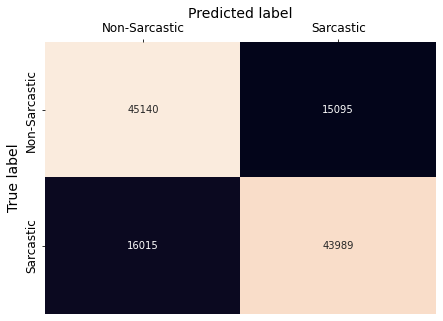

In [29]:
predict()